In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=15, batch_size=16, verbose=1)
	# save model
	model.save('final_model.h5')

run_test_harness()

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/15
3750/3750 [==============================] - 14s 2ms/step - loss: 0.6007 - accuracy: 0.7774
Epoch 2/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3099 - accuracy: 0.8898
Epoch 3/15
3750/3750 [==============================] - 8s 2ms/step - loss: 0.2717 - accuracy: 0.9013
Epoch 4/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2404 - accuracy: 0.9118
Epoch 5/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2171 - accuracy: 0.9197
Epoch 6/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2026 - accuracy: 0.9252
Epoch 7/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1838 - accuracy: 0.9325
Epoch 8/15
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1711 - accuracy: 0.9381
Epoch 9/15
3750/3750 [==============================] - 8s 2ms/step - loss: 0.1589 - accuracy: 0.9402
Epoch 10/15
3750/3

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np


def load_image(filename):
	img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
    # img.show()
	return img

In [ ]:
outputs = {0: 'Pullover',
1: 'Trouser',
2: 'Bag',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'T-shirt/top',
9: 'Ankle boot'}

In [3]:
def run_example():
    img = load_image("shoe.webp.jpg")
    model = load_model("final_model.h5")
    result = model.predict_classes(img)
    print(result)
    return result

myresult = run_example()
keyword = outputs[myresult[0]]
print(keyword)

FileNotFoundError: ignored

In [ ]:
from bs4 import BeautifulSoup
import requests


# keyword = 'shirt'
quote_page = 'https://www.ebay.com/sch/i.html?_from=R40&_trksid=m570.l1313&_nkw=' + keyword +'&_sacat=0'
page = requests.get(quote_page)
soup = BeautifulSoup(page.text, 'html.parser')

# print('price')
price = soup.findAll("span", {"class": "s-item__price"})
# print(price)
# print('title')
title = soup.findAll("h3", {"class": "s-item__title"})
# print(title)
# print('img')
img = soup.findAll("img", {"class": "s-item__image-img"})
# print(img)

fatherdata = []

for a in range(10):
    finlist = []

    finlist.append(price[a].text)
    finlist.append(title[a].text)
    finlist.append(img[a].get('src'))

    fatherdata.append(finlist)
    print(finlist)

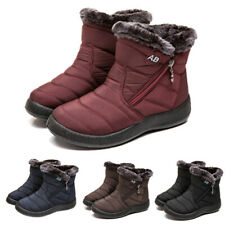

In [ ]:
from PIL import Image
import requests


im = Image.open(requests.get(fatherdata[0][-1], stream=True).raw)
  
im



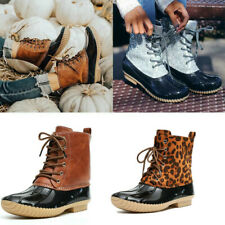

In [ ]:
im = Image.open(requests.get(fatherdata[1][-1], stream=True).raw)
  
im

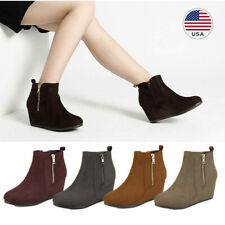

In [ ]:
im = Image.open(requests.get(fatherdata[2][-1], stream=True).raw)
  
im

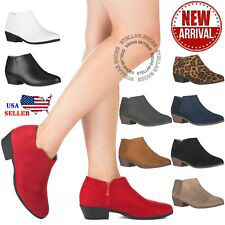

In [ ]:
im = Image.open(requests.get(fatherdata[3][-1], stream=True).raw)
  
im

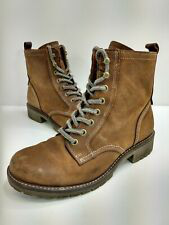

In [ ]:
im = Image.open(requests.get(fatherdata[4][-1], stream=True).raw)
  
im

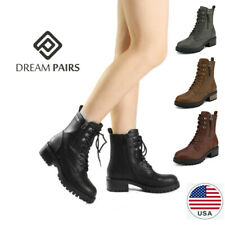

In [ ]:
im = Image.open(requests.get(fatherdata[5][-1], stream=True).raw)
  
im